In [ ]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

EJERCICIO 1

In [ ]:
%matplotlib widget
img = cv.imread("imagenes/img.tif",cv.IMREAD_GRAYSCALE)

prewitt_h = np.array([[-1,-1,-1],[0,0,0],[1,1,1]])
prewitt_v = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
prewitt_dd = np.array([[0,1,1],[-1,0,1],[-1,-1,0]])
prewitt_di = np.array([[-1,-1,0],[-1,0,1],[0,1,1]])

img_filt = cv.filter2D(img,-1,prewitt_h)
ret,img_thresh1 = cv.threshold(img_filt,127,255,cv.THRESH_BINARY)

img_filt2 = cv.filter2D(img,-1,prewitt_v)
ret,img_thresh2 = cv.threshold(img_filt2,127,255,cv.THRESH_BINARY)
img_thresh3=img_filt+img_filt2

fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(10,10)) 
ax[0,0].imshow(img,cmap='gray',vmin=0,vmax=255)
ax[0,1].imshow(img_filt,cmap='gray',vmin=0,vmax=255)

ax[1,0].imshow(img_thresh1,cmap='gray',vmin=0,vmax=255)
ax[1,1].imshow(img_thresh2,cmap='gray',vmin=0,vmax=255)

ax[2,0].imshow(img_thresh3,cmap='gray',vmin=0,vmax=255)

plt.show()

c:\Users\ignac\anaconda3\envs\pdi\Lib\site-packages\matplotlib\image.py:484: RuntimeWarning: invalid value encountered in subtract
  A_scaled -= a_min


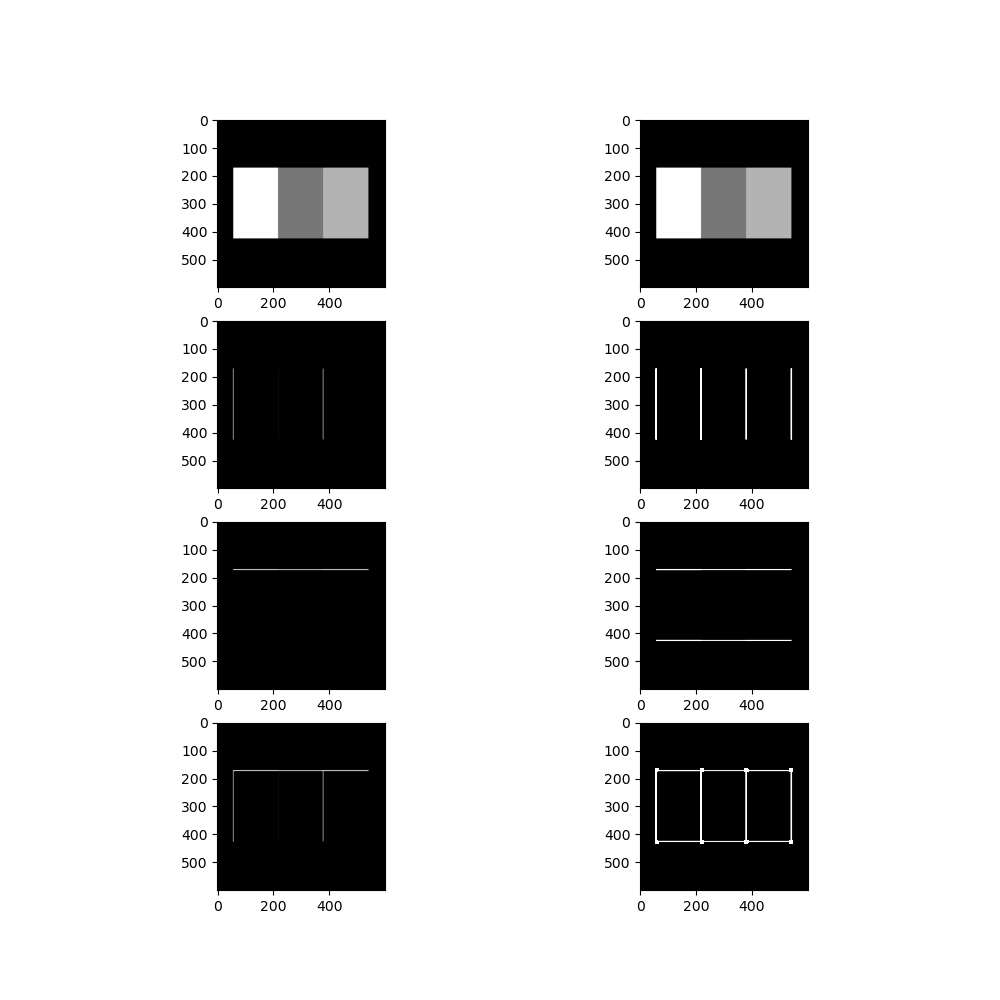

In [12]:
imagen = cv.imread("imagenes/patron_bordes.jpg",cv.IMREAD_GRAYSCALE)

imagen_sobelx = cv.Sobel(imagen,-1,1,0,ksize=3)
imagen_sobelx64 = abs(cv.Sobel(imagen,cv.CV_64F,1,0,ksize=-1))

imagen_sobely = cv.Sobel(imagen,-1,0,1,ksize=3)
imagen_sobely64 = abs(cv.Sobel(imagen,cv.CV_64F,0,1,ksize=3))

imagen_sobelxy = cv.bitwise_or(imagen_sobelx,imagen_sobely) 
imagen_sobelxy64 = cv.bitwise_or(imagen_sobelx64,imagen_sobely64) 


fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(10,10)) 
ax[0,0].imshow(imagen,cmap='gray',vmin=0,vmax=255)
ax[0,1].imshow(imagen,cmap='gray',vmin=0,vmax=255)

ax[1,0].imshow(imagen_sobelx,cmap='gray',vmin=0,vmax=255)
ax[1,1].imshow(imagen_sobelx64,cmap='gray',vmin=0,vmax=255)

ax[2,0].imshow(imagen_sobely,cmap='gray',vmin=0,vmax=255)
ax[2,1].imshow(imagen_sobely64,cmap='gray',vmin=0,vmax=255)

ax[3,0].imshow(imagen_sobelxy,cmap='gray',vmin=0,vmax=255)
ax[3,1].imshow(imagen_sobelxy64,cmap='gray',vmin=0,vmax=255)

plt.show()

In [ ]:
%matplotlib widget
img = cv.imread("imagenes/camaleon.tif",cv.IMREAD_GRAYSCALE)

img_filt = cv.Laplacian(img,cv.CV_64F,ksize=3)
ret,img_threshlapla = cv.threshold(img_filt,127,255,cv.THRESH_BINARY)


fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,10)) 
ax[0,0].imshow(img,cmap='gray',vmin=0,vmax=255)
ax[0,1].imshow(img_filt,cmap='gray',vmin=0,vmax=255)

ax[1,0].imshow(img_threshlapla,cmap='gray',vmin=0,vmax=255)

plt.show()

In [ ]:
# cv.namedWindow("Canny",cv.WINDOW_AUTOSIZE)
# cv.waitKey(0)
# cv.desotroyAllWindows()

In [23]:
import ipywidgets as widgets
from ipywidgets import interact


def fcanny(vmin,vmax):
    bordes = cv.Canny(img,vmin,vmax)
    bordes2 = cv.Canny(img,vmin,vmax,L2gradient=True)
    fig, ax = plt.subplots(nrows=2, ncols=2) 
    ax[0,0].imshow(img,cmap="gray",vmin=0,vmax=255)
    ax[0,1].imshow(img,cmap="gray",vmin=0,vmax=255)
    ax[1,0].imshow(bordes,cmap="gray",vmin=0,vmax=255)
    ax[1,1].imshow(bordes2,cmap="gray",vmin=0,vmax=255)
    plt.show()

img = cv.imread("imagenes/camaleon.tif",cv.IMREAD_GRAYSCALE)

interact(fcanny,vmin=widgets.IntSlider(min=0,max=256,value=140),vmax=widgets.IntSlider(min=0,max=256,value=200))

interactive(children=(IntSlider(value=140, description='vmin', max=256), IntSlider(value=200, description='vma…

<function __main__.fcanny(vmin, vmax)>

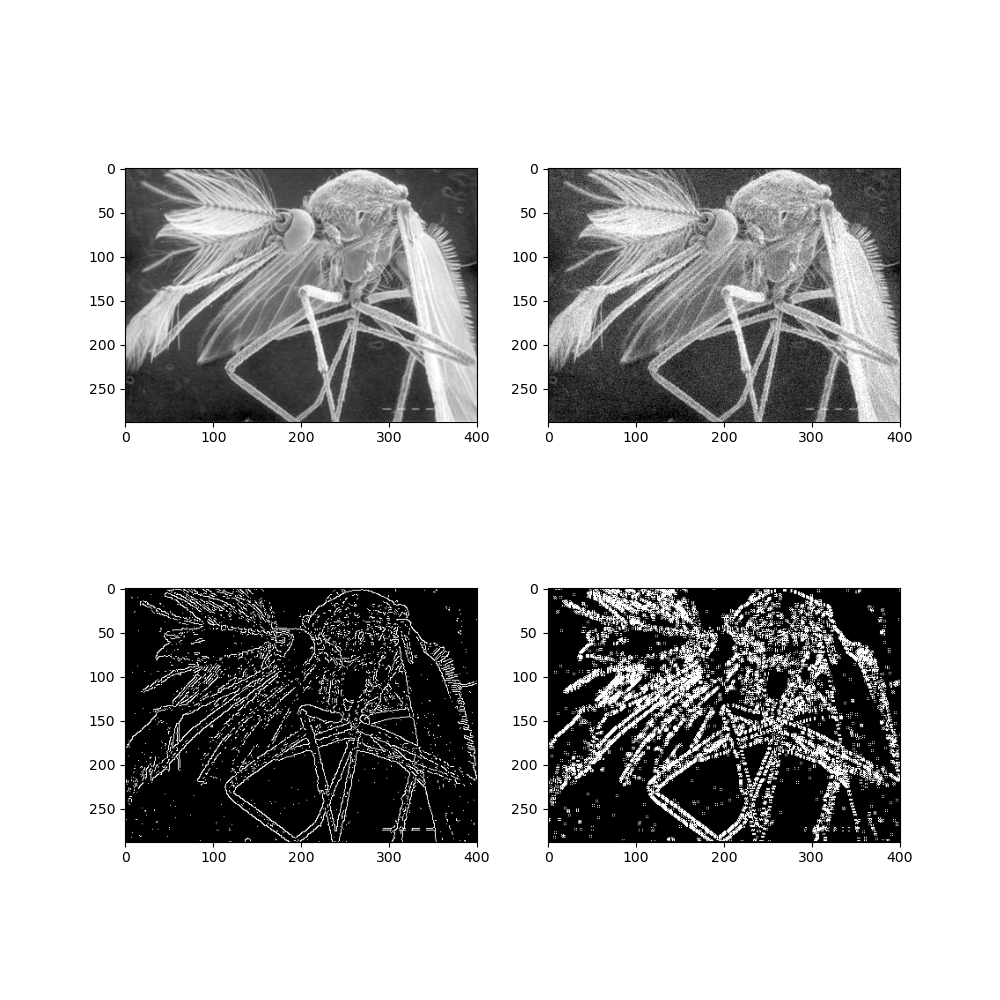

In [56]:
%matplotlib widget
mosquito = cv.imread("imagenes/mosquito.jpg",cv.IMREAD_GRAYSCALE)

#gaussian noise
mosquito_noise =mosquito + np.random.normal(0, 15, (mosquito.shape[0],mosquito.shape[1]))
mosquito_noise = np.clip(mosquito_noise, 0, 255)
mosquito_noise = mosquito_noise.astype(np.uint8)

mosquito_canny = cv.Canny(mosquito_noise,240,250)

mosquito_sobel_x = abs(cv.Sobel(mosquito_canny,cv.CV_64F,1,0,ksize=3))
mosquito_sobel_y = abs(cv.Sobel(mosquito_canny,cv.CV_64F,0,1,ksize=3))
mosquito_sobel_xy = abs(cv.Sobel(mosquito_canny,cv.CV_64F,1,1,ksize=3))


fig, ax = plt.subplots(nrows=2, ncols=2,figsize=(10,10)) 
ax[0,0].imshow(mosquito,cmap="gray",vmin=0,vmax=255)
ax[0,1].imshow(mosquito_noise,cmap="gray",vmin=0,vmax=255)

ax[1,0].imshow(mosquito_canny,cmap='gray',vmin=0,vmax=255)
ax[1,1].imshow(mosquito_sobel_xy,cmap="gray",vmin=0,vmax=255)
plt.show()